In [6]:
import pandas as pd

df = pd.read_csv('Kochi_NO2.txt')


In [7]:
import numpy as np

In [8]:
df

,date,open_NO2,sate_NO2,"Vyttila, Kochi - Kerala PCB"
0,2020-11-24,14.055000,3.226402e+15,56.96
1,2020-11-25,4.784167,3.640530e+15,19.07
2,2020-11-26,11.092083,2.864560e+15,0.25
3,2020-11-27,10.245000,3.100670e+15,3.25
4,2020-11-28,9.125000,2.730080e+15,13.63
...,...,...,...,...
398,2021-12-27,9.761667,4.607660e+15,11.43
399,2021-12-28,12.198333,3.112368e+15,12.01
400,2021-12-29,12.597500,3.842800e+15,13.66
401,2021-12-30,14.484583,2.647600e+15,17.09


In [9]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [10]:
y = df['open_NO2']
x = df.drop(columns =["date", "open_NO2"])

In [11]:
df.describe()

,open_NO2,sate_NO2,"Vyttila, Kochi - Kerala PCB"
count,403.000000,4.030000e+02,403.00000
mean,9.620247,3.262590e+15,10.57000
std,5.620927,5.885405e+14,10.23165
min,1.290000,-4.525900e+14,0.25000
25%,4.181042,2.893535e+15,3.38000
50%,9.736250,3.221540e+15,5.02000
75%,13.310417,3.583600e+15,17.45000
max,27.275833,5.437710e+15,56.96000


# Normal OLS

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LinearRegression().fit(x,y)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

4.564407729831103

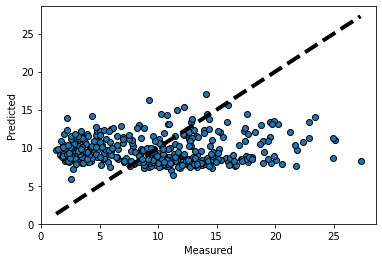

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict


predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# LASSO

In [14]:
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
model = linear_model.Lasso(alpha=0.1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

4.563983760983467

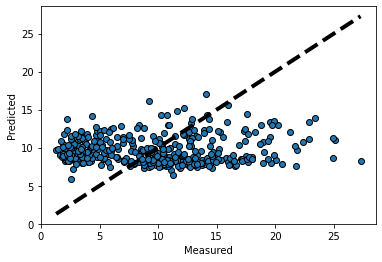

In [15]:


predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Ridge

In [16]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

4.564407529496756

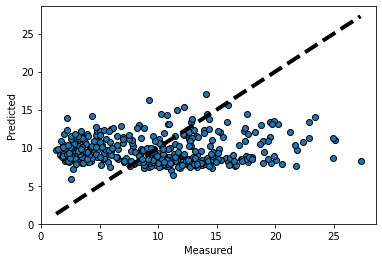

In [17]:

predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Elastic Net

In [18]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(random_state=0)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

4.562270240745556

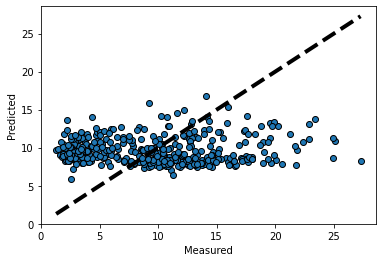

In [19]:

predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Decision tree

In [20]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

5.266870799266526

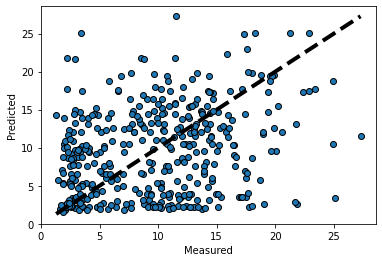

In [21]:

predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [22]:
regr = tree.DecisionTreeRegressor()
model = regr.fit(x, y)
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_1 <= 3.77
|   |--- feature_1 <= 2.99
|   |   |--- feature_0 <= 3637225937960960.00
|   |   |   |--- feature_1 <= 2.26
|   |   |   |   |--- feature_0 <= 2858055117045760.00
|   |   |   |   |   |--- value: [2.44]
|   |   |   |   |--- feature_0 >  2858055117045760.00
|   |   |   |   |   |--- feature_1 <= 1.22
|   |   |   |   |   |   |--- value: [11.09]
|   |   |   |   |   |--- feature_1 >  1.22
|   |   |   |   |   |   |--- value: [10.83]
|   |   |   |--- feature_1 >  2.26
|   |   |   |   |--- feature_1 <= 2.52
|   |   |   |   |   |--- feature_1 <= 2.48
|   |   |   |   |   |   |--- feature_0 <= 3389049976913920.00
|   |   |   |   |   |   |   |--- feature_0 <= 2645389006077952.00
|   |   |   |   |   |   |   |   |--- value: [2.95]
|   |   |   |   |   |   |   |--- feature_0 >  2645389006077952.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 3187298048933888.00
|   |   |   |   |   |   |   |   |   |--- value: [2.30]
|   |   |   |   |   |   |   |   |--- feature_0 >  31872980489

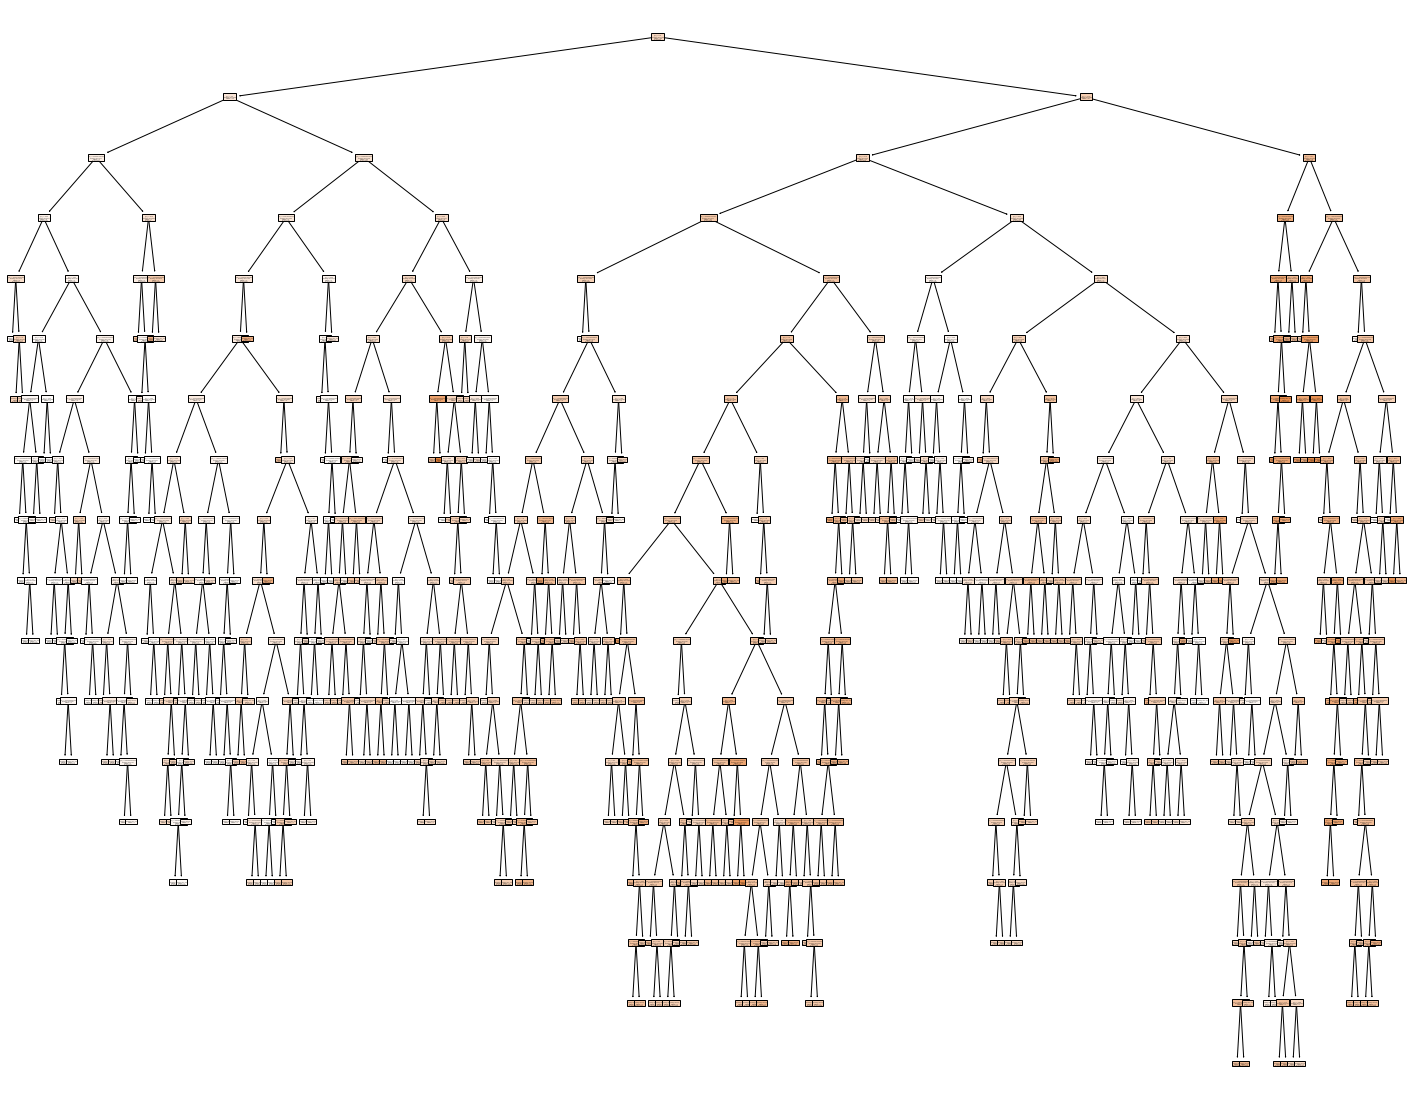

In [23]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True)